# Import libraries

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [59]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,28.946574,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.946574,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [60]:
df["age"].fillna(df["age"].mean(), inplace = True)

# Data Visualization

<AxesSubplot:xlabel='sex', ylabel='age'>

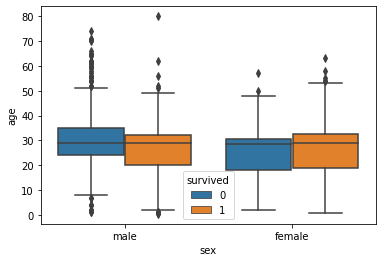

In [64]:
#display the distribution for the age with respect to each gender along with the information about whether or not they survived
sns.boxplot(x='sex', y='age', data=df, hue="survived")

<AxesSubplot:xlabel='class', ylabel='age'>

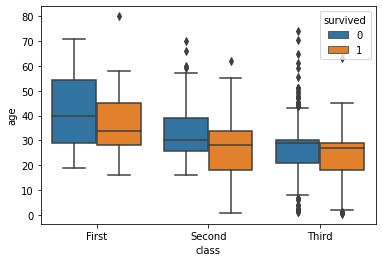

In [65]:
#display the distribution for the age with respect to each class along with the information about whether or not they survived
sns.boxplot(x='class', y='age', data=df, hue="survived")

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

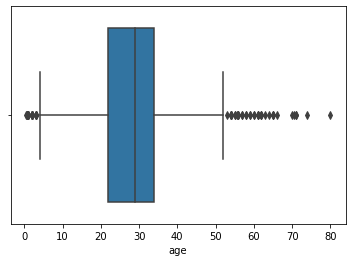

In [66]:
sns.boxplot(df["age"])

In [4]:
#detecting outliers
Q1=np.percentile(df["age"],df["age"].min(),interpolation="midpoint")

In [5]:
Q3=np.percentile(df["age"],df["age"].max(),interpolation="midpoint")

In [6]:
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [7]:
print(np.where(df["age"]>=upper))

(array([], dtype=int64),)


In [8]:
print(np.where(df["age"]<=lower))

(array([], dtype=int64),)


In [9]:
lowlier=np.where(df["age"]<=lower)
df.drop(lowlier[0],inplace=True)

In [11]:
uplier=np.where(df["age"]>=upper)
df.drop(uplier[0],inplace=True)

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

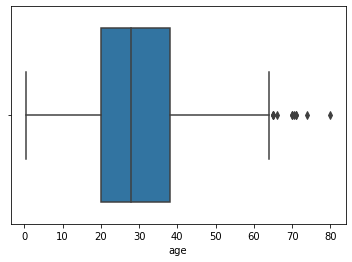

In [12]:
sns.boxplot(df["age"])